[<ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fd50f3d7400>, <ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fd50fa4f400>, <ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fd50d000e00>, <ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fd50b78f600>]
Fit mean= 1.6344991638673838


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ver


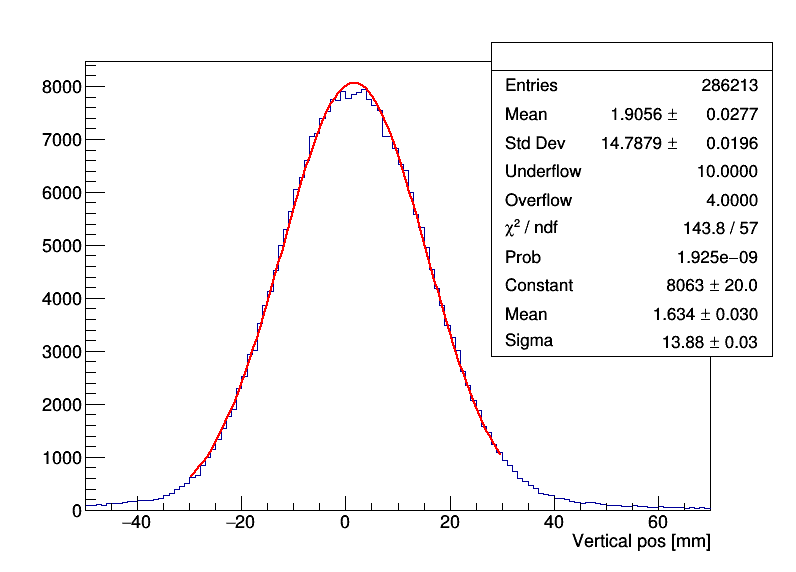

In [53]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle

#Define constant paths and labels 
station12Path = "Extrapolation/vertices/station12/pValue>0.005_and_noVolumesHit/"
station18Path = "Extrapolation/vertices/station18/pValue>0.005_and_noVolumesHit/"
path = [station12Path, station18Path] # S12 (0) and S18 (1)
scr_nominal = "/Users/gleb/software/alignTrack/mpIIDESY/Systematics_ana/nominal/trackRecoPlots.root"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/Systematics_ana/Global/trackRecoPlots.root"
plotNames=["h_radialPos_vs_time", "h_verticalPos_vs_time"] 
stationN = 2 # S12 (0) and S18 (1)
viewN = 2 # radial (0) and vertical (1)
stateN=2 # nominal (0) and global shift (1)

#Containers to store stored histograms 
ver_histos_2D=[]
ver_histos_1D=[]
rad_histos_2D=[]
rad_histos_1D=[]

#Open TFiles
scrFile_nominal = TFile.Open(scr_nominal)
scrFile_shift = TFile.Open(scr_shift)
fileName = [scrFile_nominal, scrFile_shift]

###### Vertical ##########

#Get TH2F histo 
for i_station in range(0, stationN):
    for i_state in range(0, stateN):
        ver_histos_2D.append(fileName[i_state].Get(str(path[i_station])+plotNames[1])) # 1 = vertical here 

print(ver_histos_2D)        
        
s12_ver_2D = ver_histos_2D[0]

#Make new canvas for plots 
c_ver = TCanvas("c_ver", "Vertical Projection", 800, 600)
c_ver.Divide(1,1)

c_ver.cd(1)
# #Apply 30 us time cut 
first_bin = s12_ver_2D.GetXaxis().FindBin(30.0) 

# Project the beam postion into 1D histo
s12_ver_Y = s12_ver_2D.ProjectionY("", first_bin, -1)
s12_ver_Y.SetTitle("")
s12_ver_Y.GetXaxis().SetRangeUser(-50, 70) # Same range as Joe's 
s12_ver_Y.Draw()

#Define a Gaussian fit function between -30 to 30 mm 
gF = TF1("gF", "gaus", -30.0, 30.0)
s12_ver_Y.Fit(gF, "QR", ) # quite fit over specified range

s12_ver_Y_mean = gF.GetParameter(1)
s12_ver_Y_mean_error = gF.GetParError(1)
s12_ver_Y_sd = gF.GetParameter(2)
s12_ver_Y_sd_error = gF.GetParError(2) 

print("Fit mean=", s12_ver_Y_mean)


gStyle.SetOptStat("neouRM") #over/under -flows, Rms and Means with errors, number of entries
gStyle.SetOptFit(1111)  #probability, Chi2, errors, name/values of parameters
gStyle.SetStatFormat("11.4f")  # 4 sig.fig, f=float
c_ver.Draw()